In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from utils.utilities import fetch_data
from utils.envs import TradingEnv7, TradingEnv8, TradingEnv9
from utils.td3 import Agent, DeepAgent
from utils.pred import Predictor

In [4]:
import warnings

warnings.simplefilter('ignore')

In [5]:
%matplotlib inline

---

In [6]:
env_name = 'TradingEnv9'
file_name = 'all_td3/TD3_TradingEnv9_pred_70_850'
db_name = './data/HistoricalPriceData.db'

seed = 100

In [7]:
torch.manual_seed(seed)
np.random.seed(seed)

##### Fetch the data

In [8]:
data = fetch_data(db_name)

##### Initialize environment and set seeds

In [9]:
env = eval(f'{env_name}(data)')
env.seed(seed)

In [10]:
state_dim = np.prod(env.observation_space.shape)
action_dim = env.action_space.shape[0]
max_action = float(env.action_space.high[0])

##### Initialize agent

In [11]:
agent_state_dim = env.observation_space.shape[0] * (env.observation_space.shape[1]+1)

In [12]:
#agent = DeepAgent(
agent = Agent(
    state_dim=agent_state_dim, 
    action_dim=action_dim, 
    max_action=max_action,
)


In [13]:
agent.load(file_name, './models')

##### Initialize predictor model

In [14]:
pred_input = (env.observation_space.shape[0]-1) * (env.observation_space.shape[1]-2)
pred_output = env.action_space.shape[0] - 1

In [15]:
predictor = Predictor(
    input_dim=pred_input, 
    output_dim=pred_output,
)

In [16]:
predictor.load(file_name, './models')

##### Test:

In [17]:
positions = env.positions

In [18]:
actions = []
rewards = []

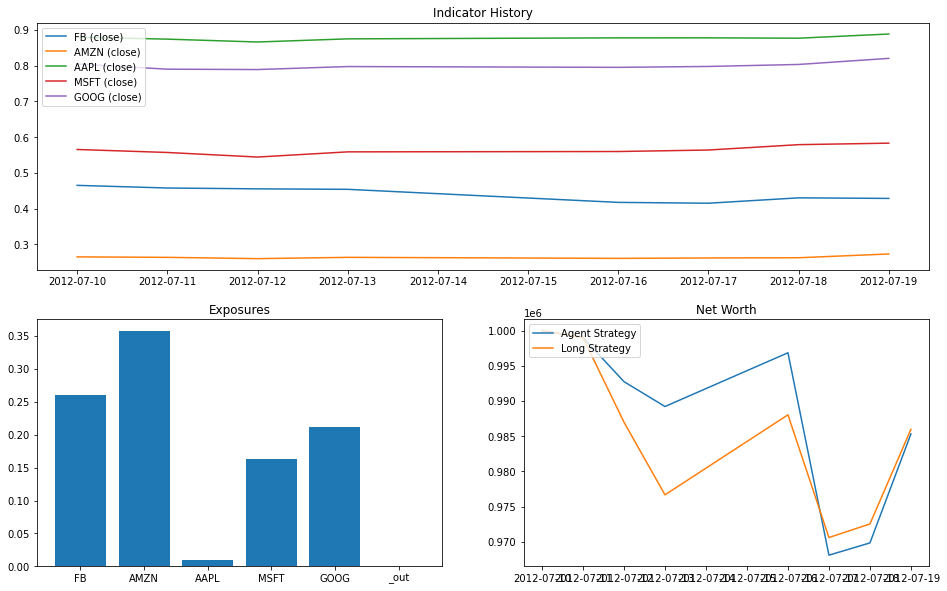

In [ ]:
for episode in np.arange(1):

    done = False
    obs = env.reset()

    while not done:
            
        agent_obs = predictor.predict(obs)

        action = agent.select_action(agent_obs)
        action_fmt = env.format_action(positions, action)

        new_obs, reward, done, info = env.step(action_fmt)
        
        actions.append(action)
        rewards.append(reward)
        
        obs = new_obs
        
        env.render()
    